In [4]:
library(dynlm)
library(car)
library(carData)
library(zoo)
library(xts)
library(tsbox)
library(tseries)
library(forecast)

Warning message:
"package 'dynlm' was built under R version 3.5.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'car' was built under R version 3.5.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.3"Warning message:
"package 'xts' was built under R version 3.5.3"Warning message:
"package 'tsbox' was built under R version 3.5.3"Warning message:
"package 'tseries' was built under R version 3.5.3"Warning message:
"package 'forecast' was built under R version 3.5.3"

In [5]:
# Making an xts object for the data
# Gujarat

gujarat <- as.data.frame(read.csv("../../Data/TimeSeries/Gujarat.csv", sep = ",", colClasses=c("character","numeric", "numeric", "numeric", "numeric")))
# head(gujarat)
gujarat$Date <- as.Date(gujarat$Date , format = "%d-%b-%y")
gujarat.xts <- xts(gujarat, order.by=gujarat$Date)
gujarat.xts <- gujarat.xts[, colnames(gujarat.xts) != "Date"]
gujarat.xts

           NewCases Recovered Deaths Lockdown
2020-03-14 "  0"    " 0"      "0"    "0"     
2020-03-15 "  0"    " 0"      "0"    "0"     
2020-03-16 "  0"    " 0"      "0"    "0"     
2020-03-17 "  0"    " 0"      "0"    "0"     
2020-03-18 "  0"    " 0"      "0"    "0"     
2020-03-19 "  2"    " 0"      "0"    "0"     
2020-03-20 "  5"    " 0"      "0"    "0"     
2020-03-21 "  7"    " 0"      "0"    "0"     
2020-03-22 "  4"    " 0"      "1"    "0"     
2020-03-23 " 12"    " 0"      "0"    "0"     
2020-03-24 "  4"    " 0"      "0"    "0"     
2020-03-25 "  4"    " 0"      "0"    "1"     
2020-03-26 "  5"    " 0"      "2"    "1"     
2020-03-27 "  4"    " 0"      "0"    "1"     
2020-03-28 "  8"    " 0"      "1"    "1"     
2020-03-29 "  8"    " 1"      "1"    "1"     
2020-03-30 "  7"    " 2"      "1"    "1"     
2020-03-31 "  4"    " 2"      "0"    "1"     
2020-04-01 " 13"    " 0"      "0"    "1"     
2020-04-02 "  1"    " 5"      "1"    "1"     
2020-04-03 "  7"    " 0"      "2" 

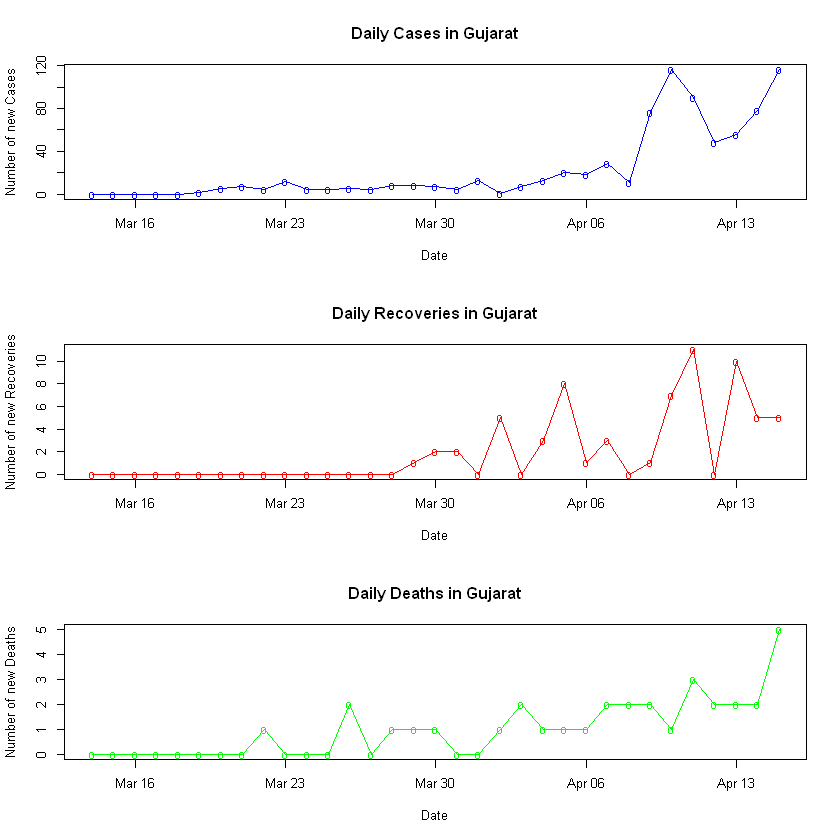

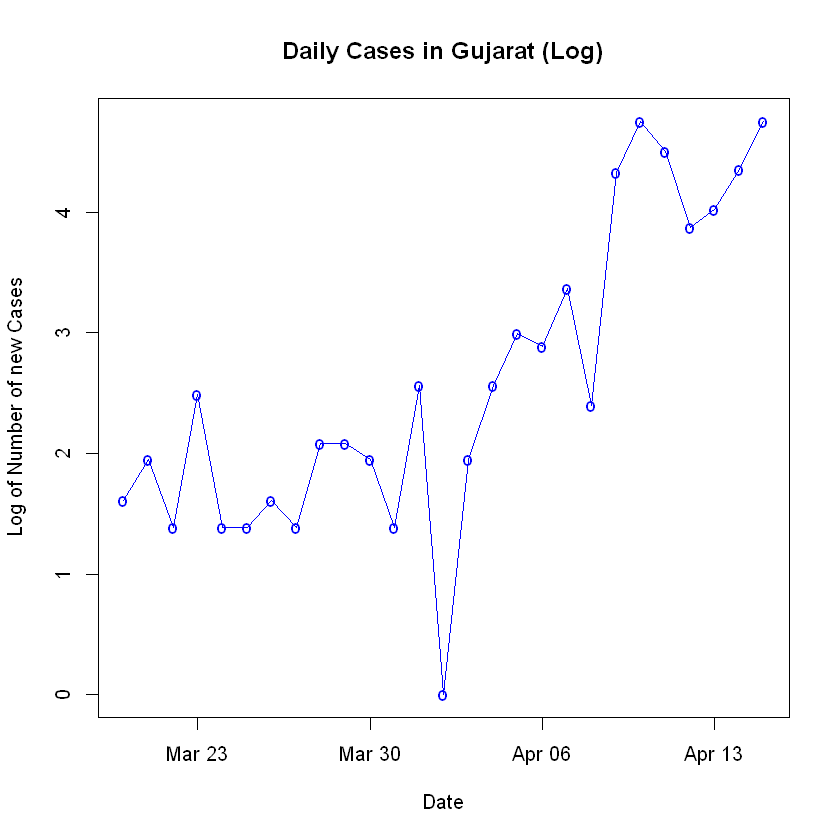

In [6]:
# Plotting Daily Data
par(mfrow = c(3,1)) # set up the graphics
plot(index(gujarat.xts), gujarat.xts$NewCases, type="o", col="blue", pch="o", lty=1, main="Daily Cases in Gujarat", ylab="Number of new Cases", xlab="Date")
plot(index(gujarat.xts), gujarat.xts$Recovered, type="o", col="red", pch="o", lty=1, main="Daily Recoveries in Gujarat", ylab="Number of new Recoveries", xlab="Date")
plot(index(gujarat.xts), gujarat.xts$Deaths, type="o", col="green", pch="o", lty=1, main="Daily Deaths in Gujarat", ylab="Number of new Deaths", xlab="Date")

# Making new dataset after 20-Mar
startDate <- as.Date("20-Mar-20" , format = "%d-%b-%y")
newGujarat.xts <- subset(gujarat.xts, index(gujarat.xts)>=startDate)
# newGujarat.xts
# Plotting log daily data
par(mfrow = c(1,1)) # set up the graphics
plot(index(newGujarat.xts), log(as.numeric(newGujarat.xts$NewCases)), type="o", col="blue", pch="o", lty=1, main="Daily Cases in Gujarat (Log)", ylab="Log of Number of new Cases", xlab="Date")
# plot(index(newGujarat.xts), log(as.numeric(newGujarat.xts$Recovered)), type="o", col="red", pch="o", lty=1, main="Daily Recoveries in Gujarat (Log)", ylab="Log of Number of new Recoveries", xlab="Date")
# plot(index(newGujarat.xts), log(as.numeric(newGujarat.xts$Deaths)), type="o", col="green", pch="o", lty=1, main="Daily Deaths in Gujarat (Log)", ylab="Log of Number of new Deaths", xlab="Date")


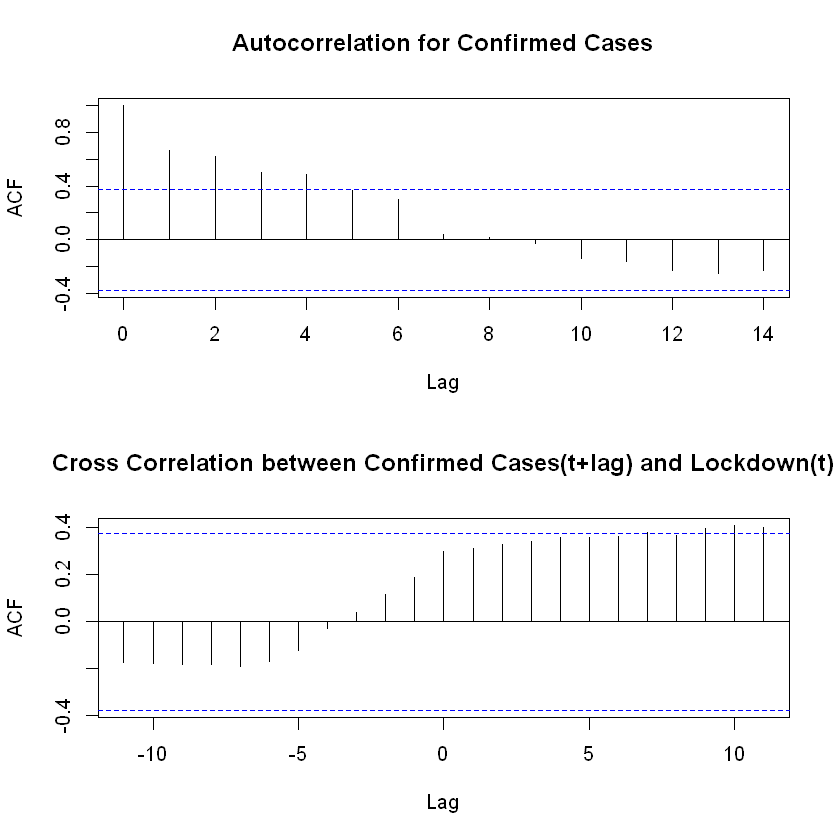

In [7]:
par(mfrow = c(2,1)) # set up the graphics
acf(log(as.numeric(newGujarat.xts$NewCases)), main="Autocorrelation for Confirmed Cases")
# acf(as.numeric(newIndia.xts$Lockdown), main="Autocorrelation for Lockdown")
ccf(as.numeric(newGujarat.xts$NewCases), as.numeric(newGujarat.xts$Lockdown), main="Cross Correlation between Confirmed Cases(t+lag) and Lockdown(t)")


In [33]:
# For lockdown, we will take today, seven days and 10 days before data

# Date objects
DaySeven <- as.Date("1-Apr" , format = "%d-%b")
DayNine <- as.Date("3-Apr", format = "%d-%b")
DayTen <- as.Date("4-Apr" , format = "%d-%b")
DayEleven <- as.Date("5-Apr", format="%d-%b")

# Creating columns
l7 <- (newGujarat.xts$Lockdown)
l9 <- (newGujarat.xts$Lockdown)
l10 <- (newGujarat.xts$Lockdown)
l11 <- (newGujarat.xts$Lockdown)

l7 <- replace(l7, index(l7)<DaySeven, "0")
l9 <- replace(l9, index(l9)<DayNine, "0")
l10 <- replace(l10, index(l10)<DayTen, "0")
l11 <- replace(l11, index(l11)<DayEleven, "0")

newGujarat.xts$Lockdown_7 <- l7
newGujarat.xts$Lockdown_9 <- l9
newGujarat.xts$Lockdown_10 <- l10
newGujarat.xts$Lockdown_11 <- l11

# Making time squared trend to be fit
# Adding plus 1 kyunki baadme vo subtract ho jaayega
timeTrend_2 <- (1:length(index(newGujarat.xts))) ^2 + 1
timeTrend <- (1:length(index(newGujarat.xts))) + 1

gujarat.reg.data <- data.frame(coredata(newGujarat.xts$Lockdown), coredata(newGujarat.xts$Lockdown_9), 
                                 timeTrend, timeTrend_2)

gujarat.reg.data.matrix <- data.matrix(gujarat.reg.data)-1
# gujarat.reg.data.matrix

In [36]:
# Making two beta waala model using auto-ARIMA and new datasets
nrows <- length(gujarat.reg.data$timeTrend)
print(nrows)

# Making a data with 6 columns, we can change entries according to the date
# Format-> Lockdown|Lockdown_7|Lockdown_10|time_trend_1|squared_time_trend_1|time_trend_2|squared_time_trend_2

modGujaratreg.data <- cbind(gujarat.reg.data,time_trend_2=gujarat.reg.data$timeTrend,
                            squared_time_trend_2=gujarat.reg.data$timeTrend_2)
colnames(modGujaratreg.data)<- c("Lockdown", "Lockdown_9", "time_trend_1", "squared_time_trend_1", 
                           "time_trend_2", "squared_time_trend_2")
# modGujaratreg.data

# ARIMA Initialisation

dataTimeSeries <- log(as.numeric(newGujarat.xts$NewCases))
aicLevel <- 1000
etaDate = index(newGujarat.xts)[1]
finalModel <- 0

# StartDate = 20th March
for (eta in (3:(nrows-2))){
    tempXreg.data <- modGujaratreg.data
    for (tempEta_2 in (1:(eta-1))){
        tempXreg.data[tempEta_2,"time_trend_2"] <- 1
        tempXreg.data[tempEta_2,"squared_time_trend_2"] <- 1
    }
    for (tempEta_1 in (eta:nrows)){
        tempXreg.data[tempEta_1,"time_trend_1"] <- 1
        tempXreg.data[tempEta_1,"squared_time_trend_1"] <- 1
    }
    
    tempXreg.matrix <- data.matrix(tempXreg.data)-1
    regressors <- tempXreg.matrix
    tempFit <- auto.arima(dataTimeSeries, xreg=regressors, method="ML")
    if(tempFit$aicc < aicLevel){
        aicLevel <- tempFit$aicc
        etaDate <- as.Date(startDate + eta)
        finalModel <- tempFit
    }
}
print(etaDate)
finalModel

[1] 27
[1] "2020-04-03"


Series: dataTimeSeries 
Regression with ARIMA(0,0,0) errors 

Coefficients:
      intercept  Lockdown  Lockdown_9  time_trend_1  squared_time_trend_1
         1.4752   -0.6531      2.4092        0.0923                0.0010
s.e.     0.5229    0.5495      0.5598        0.1998                0.0116
      time_trend_2  squared_time_trend_2
           -0.1739                0.0088
s.e.        0.1110                0.0029

sigma^2 estimated as 0.2885:  log likelihood=-17.48
AIC=50.96   AICc=58.96   BIC=61.32

[1] 28 29 30 31

Time Series:
Start = 28 
End = 31 
Frequency = 1 
[1] 197.1094 273.9924 387.6487 558.2220

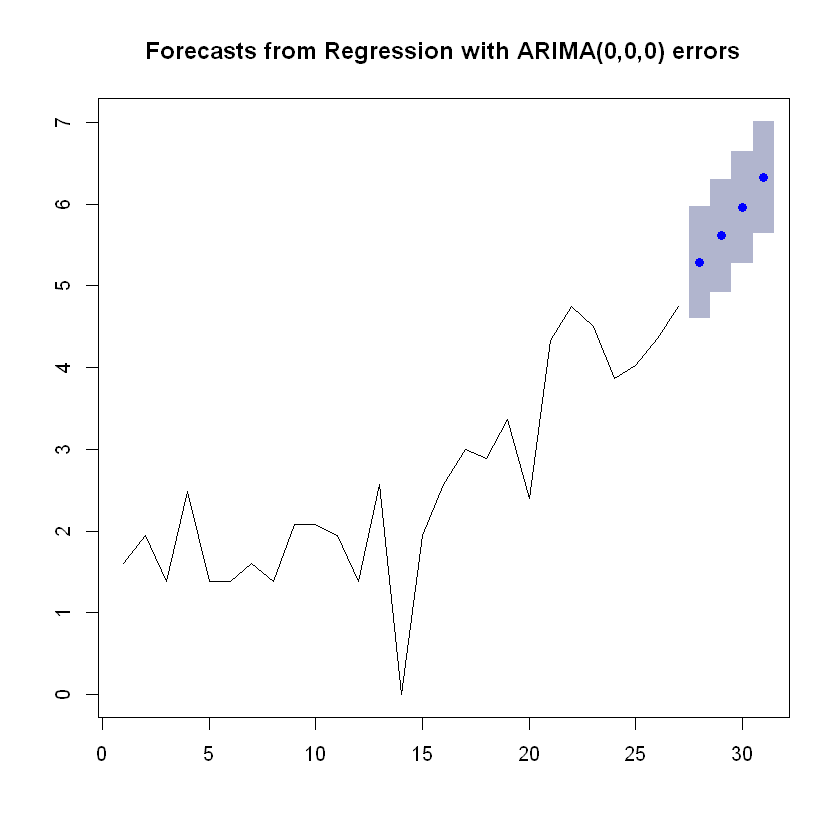

In [35]:
# Forecasting the above model
# Setting the lockdown variable for future
lastDate <- index(newGujarat.xts)[nrows]
lock <- sample(1:1, 4, replace = TRUE)
time_Before <- c(0,0,0,0)
time <- (as.numeric(lastDate-startDate+2):(as.numeric(lastDate-startDate)+5))
time
time_2 <- time * time
regressor.data <- data.frame(lock,lock,time_Before,time_Before,time,time_2)
colnames(regressor.data)<- c("Lockdown", "Lockdown_9", "time_trend_1", "squared_time_trend_1", 
                           "time_trend_2", "squared_time_trend_2")
regressor.matrix <- data.matrix(regressor.data)

# Forecast
fore <- forecast(finalModel, level=80,  xreg=regressor.matrix)
plot(fore)
# (fore$mean)
exp((fore$mean))